In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report

In [3]:
import warnings
# Suppress all warnings
warnings.filterwarnings('ignore')


In [14]:
try:
  df = pd.read_csv("/Financial Dataset.csv")
  print("File loaded successfully!")
except FileNotFoundError:
  print(f"Error: File not found. Please check the file path and try again.")

File loaded successfully!


In [15]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [17]:
df.shape

(6362620, 11)

In [18]:
df.groupby('isFlaggedFraud').count()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud
isFlaggedFraud,,,,,,,,,,
0,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604,6362604
1,16,16,16,16,16,16,16,16,16,16


In [19]:
df.pivot_table(values = 'amount',index = 'type',columns = 'isFraud',aggfunc = 'count')

isFraud,0,1
type,,
CASH_IN,1399284.0,NaN
CASH_OUT,2233384.0,4116.0
DEBIT,41432.0,NaN
PAYMENT,2151495.0,NaN
TRANSFER,528812.0,4097.0


In [20]:
df_filtered = df[df.type.isin(['CASH_OUT','TRANSFER'])]

In [21]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()
df_filtered['typeEncoded'] = encoder.fit_transform(df_filtered['type'])
df_filtered.pivot_table(values = 'amount',index = 'typeEncoded',columns = 'isFraud',aggfunc = 'count')

isFraud,0,1
typeEncoded,,
0,2233384,4116
1,528812,4097


In [22]:
df_filtered.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,typeEncoded
2,1,TRANSFER,181.00,C1305486145,181.0,0.0,C553264065,0.0,0.00,1,0,1
3,1,CASH_OUT,181.00,C840083671,181.0,0.0,C38997010,21182.0,0.00,1,0,0
15,1,CASH_OUT,229133.94,C905080434,15325.0,0.0,C476402209,5083.0,51513.44,0,0,0
19,1,TRANSFER,215310.30,C1670993182,705.0,0.0,C1100439041,22425.0,0.00,0,0,1
24,1,TRANSFER,311685.89,C1984094095,10835.0,0.0,C932583850,6267.0,2719172.89,0,0,1


In [23]:
df2 = df_filtered.drop(['step','type','nameOrig','nameDest','isFlaggedFraud'],axis = 1)
df2.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEncoded
2,181.00,181.0,0.0,0.0,0.00,1,1
3,181.00,181.0,0.0,21182.0,0.00,1,0
15,229133.94,15325.0,0.0,5083.0,51513.44,0,0
19,215310.30,705.0,0.0,22425.0,0.00,0,1
24,311685.89,10835.0,0.0,6267.0,2719172.89,0,1


In [24]:
legit = df2[df2.isFraud == 0]
legit.shape

(2762196, 7)

In [25]:
fraud = df2[df2.isFraud == 1]
fraud.shape

(8213, 7)

In [26]:
legit_sample = legit.sample (n = 8213)
legit_sample.shape

(8213, 7)

In [27]:
legit.amount.describe()

,amount
count,2.762196e+06
mean,3.141155e+05
std,8.771441e+05
min,1.000000e-02
25%,8.290823e+04
50%,1.710345e+05
75%,3.059942e+05
max,9.244552e+07


In [28]:
fraud.amount.describe()

,amount
count,8.213000e+03
mean,1.467967e+06
std,2.404253e+06
min,0.000000e+00
25%,1.270913e+05
50%,4.414234e+05
75%,1.517771e+06
max,1.000000e+07


In [29]:
new_df = pd.concat ([legit_sample, fraud], axis = 0)
new_df.head()

,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,typeEncoded
5746736,23434.24,8244.00,0.00,0.00,23434.24,0,0
74673,61555.63,1000618.27,939062.64,655647.56,897226.09,0,0
3966398,407282.05,22600.00,0.00,0.00,407282.05,0,0
5853808,200587.96,31064.00,0.00,7386241.66,7586829.62,0,0
3186324,1170753.70,0.00,0.00,2260332.77,3431086.47,0,1


In [30]:
new_df.isFraud.value_counts()

,count
isFraud,
0,8213
1,8213


In [31]:
X = new_df.drop(['isFraud'], axis = 1)
y = new_df.isFraud

In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.2, random_state = False)

In [33]:
lr = LogisticRegression()
lr.fit(X_train, y_train)

LogisticRegression()

In [34]:
lr.score(X_test, y_test)

0.9275715155203895

In [35]:
y_pred = lr.predict(X_test)

In [36]:
cm = confusion_matrix (y_test, y_pred)
cm

array([[1441,  189],
       [  49, 1607]])

Text(50.722222222222214, 0.5, 'actual')

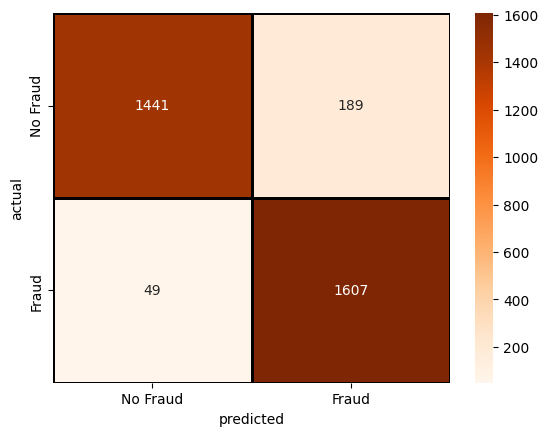

In [37]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Oranges', linewidths = 1, linecolor = 'Black')
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel('predicted')
plt.ylabel('actual')

In [38]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.88      0.92      1630
           1       0.89      0.97      0.93      1656

    accuracy                           0.93      3286
   macro avg       0.93      0.93      0.93      3286
weighted avg       0.93      0.93      0.93      3286



In [39]:
from sklearn.tree import DecisionTreeClassifier

In [40]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [41]:
d_predicted = dt.predict(X_test)

In [42]:
cm = confusion_matrix (y_test, d_predicted)
cm

array([[1609,   21],
       [  16, 1640]])

Text(50.722222222222214, 0.5, 'actual')

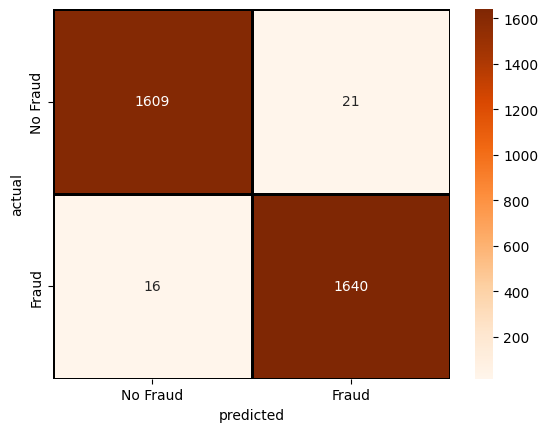

In [43]:
sns.heatmap(cm, annot = True, fmt = 'd', cmap = 'Oranges', linewidths = 1, linecolor = 'Black')
plt.xticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.yticks(np.arange(2)+.5,['No Fraud','Fraud'])
plt.xlabel('predicted')
plt.ylabel('actual')

In [44]:
print(classification_report(y_test, d_predicted))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1630
           1       0.99      0.99      0.99      1656

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286

